In [35]:
import pandas as pd
import datetime
import os.path
import sys
import backtrader as bt
sys.path.append('../lib/')

from dbConnect import *

In [48]:
datetime.date(2016,1,1)

datetime.date(2016, 1, 1)

In [61]:
fromdate = datetime.datetime(2016,1,1)
todate     = datetime.datetime(2017,1,1)

In [68]:
code = '005930'
fromdate = datetime.datetime(2010,1,1)
todate   = datetime.datetime(2017,1,1)
db_frame = pd.read_sql("SELECT * from dailycandle where code = {} and date between '{}' and '{}'".format(code, fromdate, todate), con=engine, index_col=["date"])
db_frame['openinterest'] = 0
db_frame.drop(['code'], axis=1,inplace=True);
data = bt.feeds.PandasData(dataname=db_frame)

In [70]:
db_frame.head()

,open,high,low,close,volume,openinterest
date,,,,,,
2010-01-04,803000,809000,800000,809000,239271,0
2010-01-05,826000,829000,815000,822000,559219,0
2010-01-06,829000,841000,826000,841000,459755,0
2010-01-07,841000,841000,813000,813000,443237,0
2010-01-08,820000,821000,806000,821000,295798,0


In [57]:
cerebro = bt.Cerebro()

# datapath = '2006-day-001.txt'

# dataframe = pd.read_csv(datapath,
#                                 skiprows=1,
#                                 header=None,
#                                 parse_dates=True,
#                                 index_col=0)


# print('--------------------------------------------------')
# print(dataframe)
# print('--------------------------------------------------')

    # Pass it to the backtrader datafeed and add it to the cerebro
data = bt.feeds.PandasData(dataname=db_frame)

cerebro.adddata(data)

cerebro.broker.setcash(100000)              # start cash

cerebro.addsizer(bt.sizers.FixedSize, stake=10)

cerebro.broker.setcommission(commission=0.00165)           # broker commission

print('Starting Portfolio value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio value: 100000.00


In [58]:
# %%capture
cerebro.run()

In [59]:
print('Starting Portfolio value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio value: 100000.00


<IPython.core.display.Javascript object>


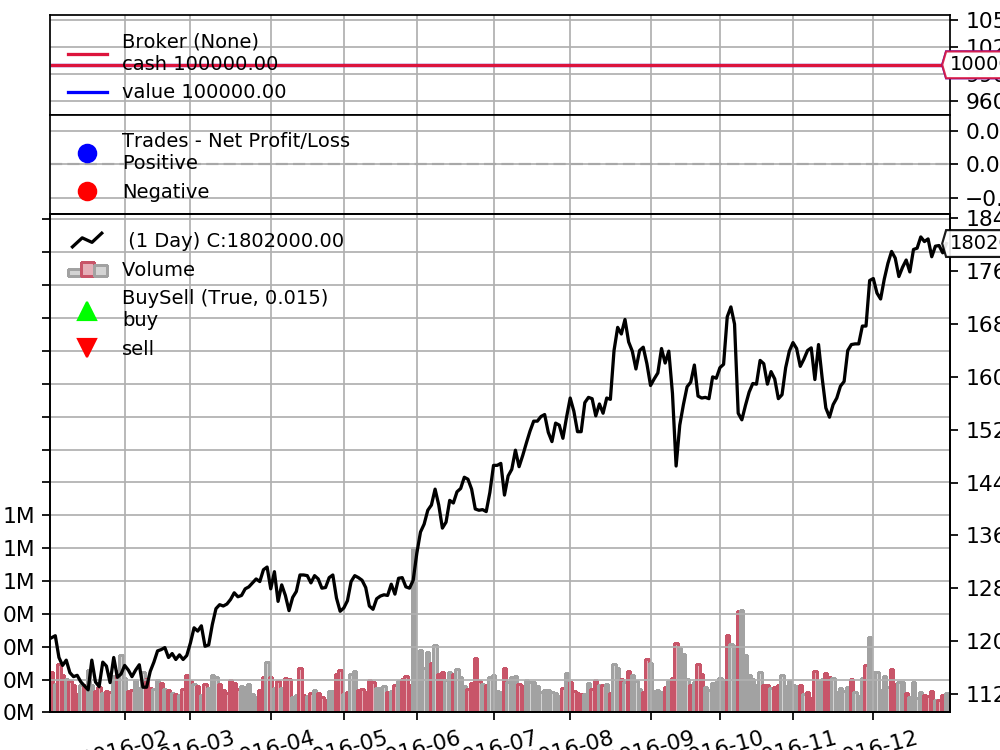

In [60]:
cerebro.plot();